## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    x = keras.layers.Dense(units=32, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [5]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

W1227 12:43:38.755182 4467553728 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1227 12:43:38.767948 4467553728 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1227 12:43:38.770427 4467553728 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1227 12:43:38.838017 4467553728 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1227 12:43:38.843518 4467553728 deprecation_wrapper.py:119] From //anac

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total para

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

W1227 12:43:38.925466 4467553728 deprecation.py:323] From /Users/yiheng/.local/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1227 12:43:38.972223 4467553728 deprecation_wrapper.py:119] From //anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 90us/step - loss: 1.9285 - acc: 0.3008 - val_loss: 1.8719 - val_acc: 0.3169
Epoch 2/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.6889 - acc: 0.3943 - val_loss: 1.6255 - val_acc: 0.4176
Epoch 3/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.5922 - acc: 0.4312 - val_loss: 1.5600 - val_acc: 0.4501
Epoch 4/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.5197 - acc: 0.4584 - val_loss: 1.5771 - val_acc: 0.4303
Epoch 5/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.4760 - acc: 0.4741 - val_loss: 1.4883 - val_acc: 0.4714
Epoch 6/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.4290 - acc: 0.4895 - val_loss: 1.5762 - val_acc: 0.4391
Epoch 7/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.3920 - acc: 0.5027 - val_loss: 1.5257 - 

50000/50000 [==============================] - 4s 71us/step - loss: 0.3693 - acc: 0.8686 - val_loss: 2.3050 - val_acc: 0.5179
Epoch 60/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.3489 - acc: 0.8747 - val_loss: 2.3123 - val_acc: 0.5282
Epoch 61/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.3470 - acc: 0.8759 - val_loss: 2.4158 - val_acc: 0.5227
Epoch 62/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.3291 - acc: 0.8830 - val_loss: 2.3602 - val_acc: 0.5265
Epoch 63/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.3236 - acc: 0.8840 - val_loss: 2.3755 - val_acc: 0.5247
Epoch 64/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.3154 - acc: 0.8863 - val_loss: 2.5722 - val_acc: 0.5038
Epoch 65/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.2991 - acc: 0.8929 - val_loss: 2.5839 - val_acc: 0.5121
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.1234 - acc: 0.9570 - val_loss: 3.6095 - val_acc: 0.5275
Epoch 119/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.1162 - acc: 0.9587 - val_loss: 3.6774 - val_acc: 0.5240
Epoch 120/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.1073 - acc: 0.9630 - val_loss: 3.5988 - val_acc: 0.5331
Epoch 121/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0972 - acc: 0.9665 - val_loss: 3.5887 - val_acc: 0.5342
Epoch 122/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.1001 - acc: 0.9653 - val_loss: 3.6035 - val_acc: 0.5314
Epoch 123/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.1186 - acc: 0.9586 - val_loss: 3.6729 - val_acc: 0.5254
Epoch 124/500
50000/50000 [==============================] - 4s 80us/step - loss: 0.1116 - acc: 0.9600 - val_loss: 3.6181 - val_acc: 0.5302
Epoch 125/500
50000/

50000/50000 [==============================] - 4s 75us/step - loss: 0.0449 - acc: 0.9850 - val_loss: 4.0654 - val_acc: 0.5346
Epoch 177/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0445 - acc: 0.9844 - val_loss: 4.1980 - val_acc: 0.5202
Epoch 178/500
50000/50000 [==============================] - 4s 77us/step - loss: 0.0823 - acc: 0.9728 - val_loss: 4.0768 - val_acc: 0.5284
Epoch 179/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.0868 - acc: 0.9710 - val_loss: 4.0896 - val_acc: 0.5278
Epoch 180/500
50000/50000 [==============================] - 4s 70us/step - loss: 0.0459 - acc: 0.9843 - val_loss: 4.0649 - val_acc: 0.5376
Epoch 181/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0467 - acc: 0.9843 - val_loss: 4.1444 - val_acc: 0.5305
Epoch 182/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.0468 - acc: 0.9833 - val_loss: 4.2346 - val_acc: 0.5232
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 4s 73us/step - loss: 0.0347 - acc: 0.9882 - val_loss: 4.3846 - val_acc: 0.5281
Epoch 235/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.0310 - acc: 0.9896 - val_loss: 4.5134 - val_acc: 0.5289
Epoch 236/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.0353 - acc: 0.9880 - val_loss: 4.4066 - val_acc: 0.5318
Epoch 237/500
50000/50000 [==============================] - 4s 71us/step - loss: 0.0407 - acc: 0.9858 - val_loss: 4.4234 - val_acc: 0.5260
Epoch 238/500
50000/50000 [==============================] - 4s 72us/step - loss: 0.0440 - acc: 0.9849 - val_loss: 4.3383 - val_acc: 0.5298
Epoch 239/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.0536 - acc: 0.9822 - val_loss: 4.3711 - val_acc: 0.5282
Epoch 240/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.0383 - acc: 0.9872 - val_loss: 4.4183 - val_acc: 0.5307
Epoch 241/500
50000/50000 [=======

50000/50000 [==============================] - 4s 72us/step - loss: 8.5573e-05 - acc: 1.0000 - val_loss: 4.5254 - val_acc: 0.5463
Epoch 293/500
50000/50000 [==============================] - 4s 72us/step - loss: 8.2265e-05 - acc: 1.0000 - val_loss: 4.5316 - val_acc: 0.5471
Epoch 294/500
50000/50000 [==============================] - 4s 72us/step - loss: 7.9699e-05 - acc: 1.0000 - val_loss: 4.5363 - val_acc: 0.5468
Epoch 295/500
50000/50000 [==============================] - 4s 73us/step - loss: 7.6857e-05 - acc: 1.0000 - val_loss: 4.5410 - val_acc: 0.5467
Epoch 296/500
50000/50000 [==============================] - 4s 72us/step - loss: 7.3989e-05 - acc: 1.0000 - val_loss: 4.5451 - val_acc: 0.5471
Epoch 297/500
50000/50000 [==============================] - 4s 74us/step - loss: 7.1654e-05 - acc: 1.0000 - val_loss: 4.5499 - val_acc: 0.5470
Epoch 298/500
50000/50000 [==============================] - 4s 71us/step - loss: 6.9914e-05 - acc: 1.0000 - val_loss: 4.5550 - val_acc: 0.5471
Epoch 

Epoch 349/500
50000/50000 [==============================] - 4s 71us/step - loss: 3.0108e-05 - acc: 1.0000 - val_loss: 4.6803 - val_acc: 0.5495
Epoch 350/500
50000/50000 [==============================] - 4s 73us/step - loss: 2.9810e-05 - acc: 1.0000 - val_loss: 4.6823 - val_acc: 0.5494
Epoch 351/500
50000/50000 [==============================] - 4s 73us/step - loss: 2.9515e-05 - acc: 1.0000 - val_loss: 4.6838 - val_acc: 0.5494
Epoch 352/500
50000/50000 [==============================] - 4s 73us/step - loss: 2.9190e-05 - acc: 1.0000 - val_loss: 4.6854 - val_acc: 0.5494
Epoch 353/500
50000/50000 [==============================] - 4s 72us/step - loss: 2.8937e-05 - acc: 1.0000 - val_loss: 4.6866 - val_acc: 0.5496
Epoch 354/500
50000/50000 [==============================] - 4s 72us/step - loss: 2.8616e-05 - acc: 1.0000 - val_loss: 4.6883 - val_acc: 0.5496
Epoch 355/500
50000/50000 [==============================] - 4s 72us/step - loss: 2.8383e-05 - acc: 1.0000 - val_loss: 4.6899 - val_acc:

Epoch 406/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.9140e-05 - acc: 1.0000 - val_loss: 4.7479 - val_acc: 0.5506
Epoch 407/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.9014e-05 - acc: 1.0000 - val_loss: 4.7489 - val_acc: 0.5502
Epoch 408/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.8889e-05 - acc: 1.0000 - val_loss: 4.7498 - val_acc: 0.5505
Epoch 409/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.8784e-05 - acc: 1.0000 - val_loss: 4.7507 - val_acc: 0.5507
Epoch 410/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.8666e-05 - acc: 1.0000 - val_loss: 4.7516 - val_acc: 0.5504
Epoch 411/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.8547e-05 - acc: 1.0000 - val_loss: 4.7526 - val_acc: 0.5500
Epoch 412/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.8436e-05 - acc: 1.0000 - val_loss: 4.7536 - val_acc:

Epoch 463/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.4144e-05 - acc: 1.0000 - val_loss: 4.7919 - val_acc: 0.5500
Epoch 464/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.4076e-05 - acc: 1.0000 - val_loss: 4.7926 - val_acc: 0.5501
Epoch 465/500
50000/50000 [==============================] - 4s 72us/step - loss: 1.4014e-05 - acc: 1.0000 - val_loss: 4.7933 - val_acc: 0.5501
Epoch 466/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.3957e-05 - acc: 1.0000 - val_loss: 4.7940 - val_acc: 0.5500
Epoch 467/500
50000/50000 [==============================] - 4s 71us/step - loss: 1.3890e-05 - acc: 1.0000 - val_loss: 4.7945 - val_acc: 0.5501
Epoch 468/500
50000/50000 [==============================] - 4s 70us/step - loss: 1.3829e-05 - acc: 1.0000 - val_loss: 4.7954 - val_acc: 0.5503
Epoch 469/500
50000/50000 [==============================] - 3s 70us/step - loss: 1.3770e-05 - acc: 1.0000 - val_loss: 4.7959 - val_acc:

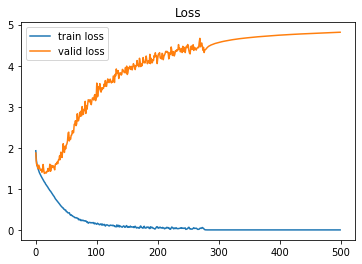

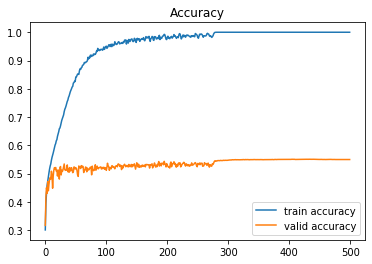

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()